# Week 11&12:  histograms, box plots, bullet charts, and Violin chart

## Author - Ganesh Kale

In [33]:
#  import required packages

import plotly.express as px
import pandas as pd
import numpy as np
from IPython.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import matplotlib as mpl

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# load data set

education = pd.read_csv('Data/education.csv')

In [3]:
# display shape and head of data

education.shape
education.head()

(52, 7)

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
0,United States,501,515,493,46,7.9,4.4
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6


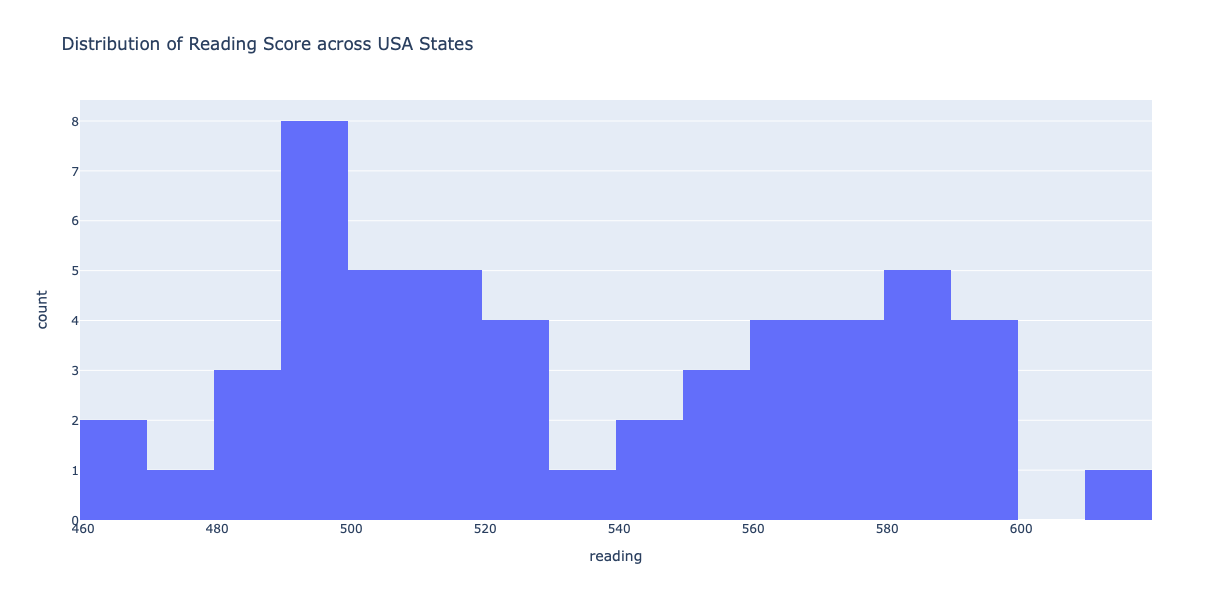

In [6]:
# plot histogram

fig = px.histogram(data_frame=education,x='reading',nbins=20,title='Distribution of Reading Score across USA States',width=1000,height=600)
fig.show()

In [21]:
# load another data 

df = pd.read_excel('Data/hotdog-contest-winners.xlsm')
df.head(2)

,Year,Winner,Dogs eaten,Country,New record,goal
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0,11
1,1981,Thomas DeBerry,11.0,United States,0,12


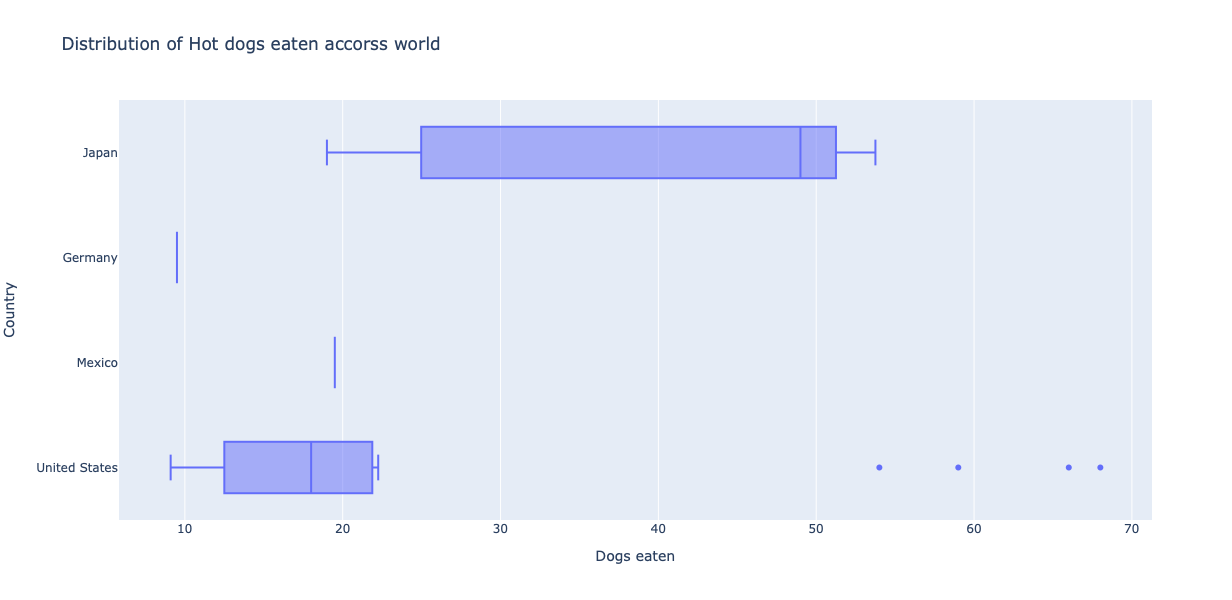

In [23]:
# plot box plot

fig = px.box(data_frame=df,x='Dogs eaten',y='Country',title='Distribution of Hot dogs eaten accorss world',width=1000,height=600)
fig.show()

In [38]:
# function to create bullet chart

def plot_bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray",chart_text_color='black'):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
            chart_text_color = color for text on the chart
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("purple", len(limits), reverse=False)
    
    # set text color
    
    mpl.rcParams['text.color'] = chart_text_color
    mpl.rcParams['axes.labelcolor'] = chart_text_color
    mpl.rcParams['xtick.color'] = chart_text_color
    mpl.rcParams['ytick.color'] = chart_text_color

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0);

/var/folders/k4/cx9xdwy96n56t56mbr585v5h0000gn/T/ipykernel_6880/1442993457.py:53: UserWarning:

FixedFormatter should only be used together with FixedLocator



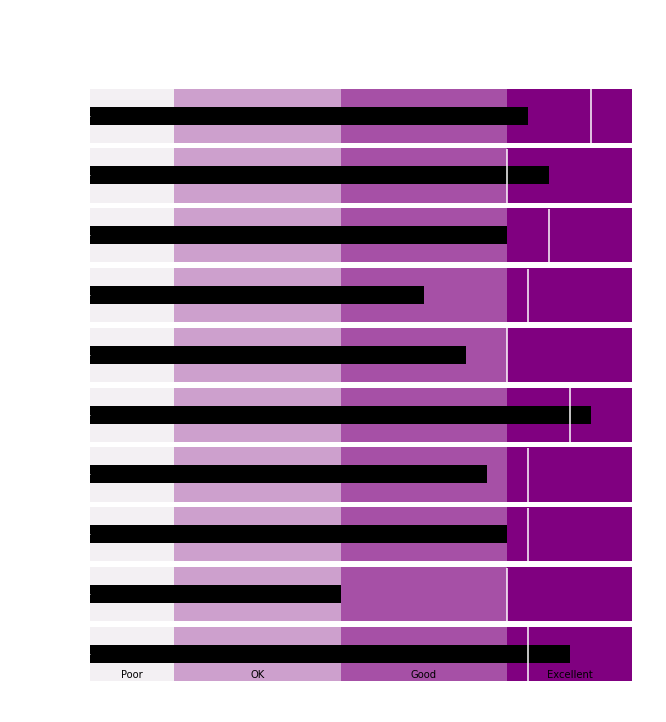

In [40]:
# Bullet chart 

# load data for bullet chart

df = pd.read_excel('Data/perf_test_data.xlsx')

data = list(df.to_records(index=False))

plot_bulletgraph(data, limits=[20, 60, 100, 130],
            labels=["Poor", "OK", "Good", "Excellent"], size=(15,11),
            axis_label="Sales Performance Measures", label_color="black",
            bar_color="black", target_color='white',
            title="Sales Representatives Performance",
           chart_text_color='white')

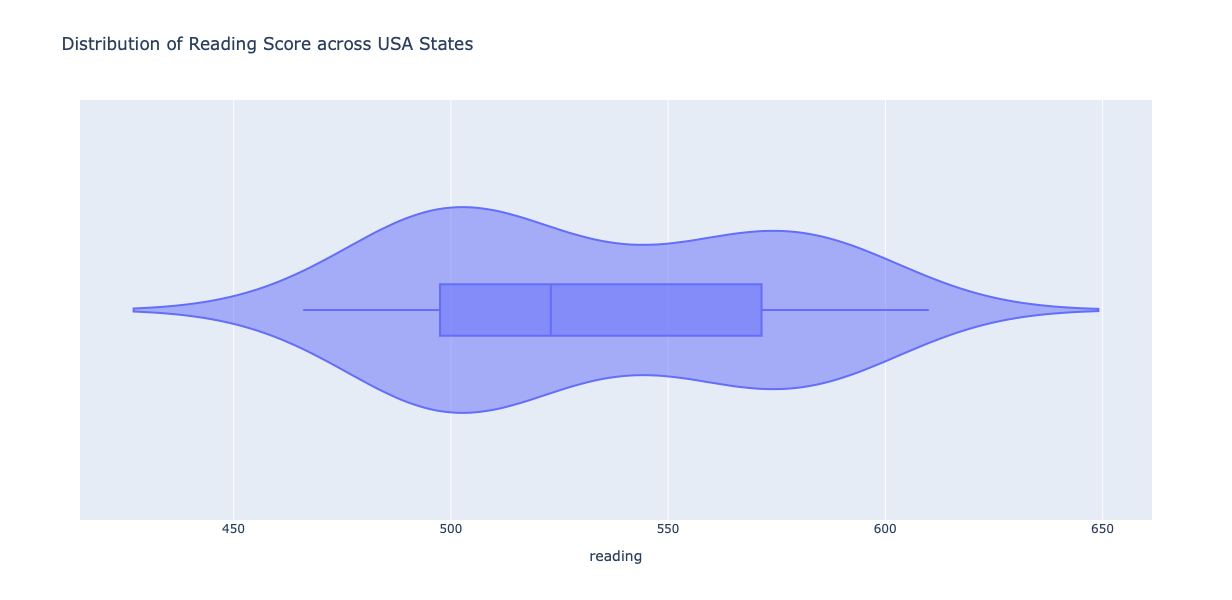

In [29]:
# Violin chart

fig = px.violin(data_frame=education,x='reading',box=True,title='Distribution of Reading Score across USA States',width=1000,height=600)
fig.show()

# END